# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [3]:
y = pd.DataFrame(boston.target, columns=['Price'])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [6]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [7]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [8]:
X_train_tsne.shape

(404, 2)

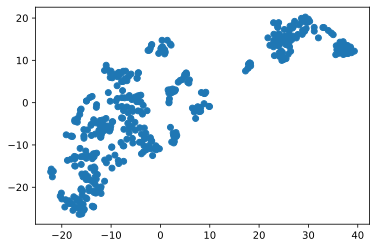

In [9]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [12]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [13]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

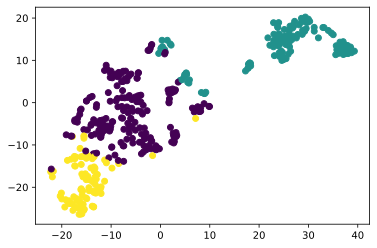

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [15]:
print(X_train[labels_train==0]['CRIM'].mean())
print(y_train[labels_train==0]['Price'].mean())

0.42166020942408367
24.958115183246072


In [16]:
print(X_train[labels_train==1]['CRIM'].mean())
print(y_train[labels_train==1]['Price'].mean())

10.797028425196853
16.165354330708666


In [17]:
print(X_train[labels_train==2]['CRIM'].mean())
print(y_train[labels_train==2]['Price'].mean())

0.07356558139534886
27.788372093023252


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [18]:
labels_test = kmeans.predict(X_test_scaled)

In [19]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

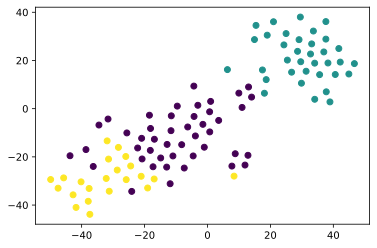

In [20]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)

In [21]:
print(X_test[labels_test==0]['CRIM'].mean())
print(y_test[labels_test==0]['Price'].mean())

0.2845831111111111
22.031111111111112


In [22]:
print(X_test[labels_test==1]['CRIM'].mean())
print(y_test[labels_test==1]['Price'].mean())

10.165531142857143
16.437142857142856


In [23]:
print(X_test[labels_test==2]['CRIM'].mean())
print(y_test[labels_test==2]['Price'].mean())

0.07985181818181818
28.413636363636364


# Дополнительное задание для работы с курсовым проектом:

### 1. Примените модель понижения размерности к вашим данным, визуализируйте их.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
df = pd.read_pickle('train_prepared.pkl')
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,11809,27,3.0,115.027311,32.781260,10.0,4,10.0,2014,0.075424,...,900.0,0,0,305018.871089,0,1,0,1,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1183.0,1,0,177734.553407,0,1,0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,240.0,3,1,282078.720850,0,1,0,1,0,1
3,2352,1,1.0,40.409907,32.781260,1.0,10,22.0,1977,0.007122,...,900.0,0,1,168106.007630,0,1,0,1,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,900.0,0,6,343995.102962,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,...,900.0,1,9,119367.455796,0,1,0,1,0,1
9996,16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,...,900.0,0,0,199715.148807,1,0,0,1,0,1
9997,2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,...,900.0,1,5,165953.912580,0,1,0,1,0,1
9998,14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,...,125.0,3,5,171842.411855,0,1,0,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Social_1       10000 non-null  int64  
 11  Social_2       10000 non-null  int64  
 12  Social_3       10000 non-null  int64  
 13  Healthcare_1   10000 non-null  float64
 14  Helthcare_2    10000 non-null  int64  
 15  Shops_1        10000 non-null  int64  
 16  Price          10000 non-null  float64
 17  Shops_2_A      10000 non-null  uint8  
 18  Shops_2

In [27]:
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.4874334914530808

In [30]:
pca = PCA(random_state=100)

In [31]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [32]:
pca.explained_variance_ratio_

array([1.47367825e-01, 1.03775011e-01, 9.67451878e-02, 9.49084129e-02,
       8.39359299e-02, 6.68200737e-02, 6.04743746e-02, 4.68162952e-02,
       4.54684215e-02, 4.48312704e-02, 4.42395092e-02, 3.88961109e-02,
       3.05670421e-02, 2.66783940e-02, 2.33555659e-02, 2.15441644e-02,
       1.40014363e-02, 8.01764499e-03, 1.55733066e-03, 5.31083821e-33,
       5.52799578e-34, 5.37910430e-34])

In [33]:
np.sum(pca.explained_variance_ratio_[:15])

0.9548794236766485

In [34]:
pca = PCA(n_components=15, random_state=100)

In [35]:
x_train_mc = pca.fit_transform(X_train_scaled)
x_test_mc = pca.fit_transform(X_test_scaled)

In [36]:
lr = LinearRegression()

In [37]:
lr.fit(x_train_mc, y_train)

LinearRegression()

In [38]:
y_pred = lr.predict(x_test_mc)

In [39]:
r2_score(y_test, y_pred)

0.3528109978937134

In [40]:
clr = RandomForestRegressor(n_estimators=1300, max_depth=11, random_state=42)
clr.fit(x_train_mc, y_train)

RandomForestRegressor(max_depth=11, n_estimators=1300, random_state=42)

In [41]:
y_pred = clr.predict(x_test_mc)
r2_score(y_test, y_pred)

0.398619879648468

Сильно ухудшилось качество моделей при применении PCA

### 2. Сделайте кластеризацию на тренировочном наборе данных. Добавьте новый признак в тренировочный и валидационный наборы данных - метка кластера. Сравнить качество работы модели без метки кластера и с ней по валидационной выборке.

In [52]:
inertia_list = []
for i in range(2, 100):
    model = KMeans(n_clusters=i, random_state=100)
    train_labels = model.fit(X_train_scaled)
    inertia_list.append(model.inertia_)

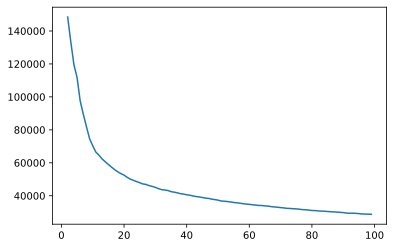

In [53]:
plt.plot([i for i in range(2,100)], inertia_list)

На основании графика, выберем количество кластеров равным 20

#### Исходная линейная модель:

In [44]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.4874334914530808

In [45]:
model = KMeans(n_clusters=20, random_state=100)
train_labels = model.fit_predict(X_train_scaled)
test_labels = model.fit_predict(X_test_scaled)
X_train_scaled_with_clusters = X_train_scaled.copy(deep=True)
X_test_scaled_with_clusters = X_test_scaled.copy(deep=True)
X_train_scaled_with_clusters['cluster_label'] = train_labels
X_test_scaled_with_clusters['cluster_label'] = test_labels

#### Линейная модель с кластеризацией:

In [46]:
lr = LinearRegression()
lr.fit(X_train_scaled_with_clusters, y_train)
y_pred = lr.predict(X_test_scaled_with_clusters)
r2_score(y_test, y_pred)

0.48752491784930674

#### Исходная модель случайного леса:

In [47]:
clr = RandomForestRegressor(n_estimators=1300, max_depth=11, random_state=42)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)
r2_score(y_test, y_pred)

0.7244964861550862

#### Случайный лес с кластеризацией:
Почему то модель лучше работает на не масштабированных данных

In [48]:
X_train_with_clusters = X_train.copy(deep=True)
X_test_with_clusters = X_test.copy(deep=True)
X_train_with_clusters['cluster_label'] = train_labels
X_test_with_clusters['cluster_label'] = test_labels

In [49]:
clr = RandomForestRegressor(n_estimators=1300, max_depth=11, random_state=42)
clr.fit(X_train_with_clusters, y_train)
y_pred = clr.predict(X_test_with_clusters)
r2_score(y_test, y_pred)

0.7238305158964242

#### Исходная модель градиентного бустинга

In [50]:
gb_model = GradientBoostingRegressor(criterion='mse', 
                                     min_samples_leaf=10, 
                                     random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
r2_score(y_test, y_pred)

0.7247908246517405

#### Градиентный бустинг с кластеризацией

In [51]:
gb_model = GradientBoostingRegressor(criterion='mse', 
                                     min_samples_leaf=10, 
                                     random_state=42)
gb_model.fit(X_train_with_clusters, y_train)
y_pred = gb_model.predict(X_test_with_clusters)
r2_score(y_test, y_pred)

0.7264523484295278

Изменение качества работы моделей при применении меток кластера во всех случаях незначительно